In [3]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
mnist = input_data.read_data_sets('MNIST_data/',one_hot =True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


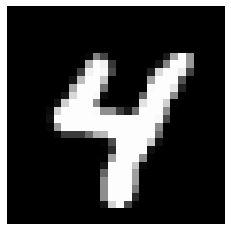

In [2]:
tf.random.set_seed(5)
batch_xs, batch_ys = mnist.train.next_batch(1)
X = batch_xs.reshape((28,28))
plt.gray()
plt.axis('off')
plt.imshow(X)
plt.show()

# difference between tf variable and placeholder:

### variable can be tweaked during training, but placeholder is meant to keep training data
### variable can be saved after the training

In [4]:
x = tf.placeholder(tf.float32, [None,784]) # input shape
w = tf.Variable(tf.zeros([784,10])) # very first w (W^[1]), has the entering shape of A^[0] (X) and gives out 10, the number of neurones in the next layer
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x,w) + b)
y_hat = tf.placeholder(tf.float32,[None,10])

<img src = './data/CrossEntropy.png' >

In [5]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_hat * tf.log(y),reduction_indices=[1]) ) # same as axis 1
# we chose axis one because we have to sum the columns to find
# a value for each digit
train_step = tf.train.GradientDescentOptimizer(.5).minimize(cross_entropy)

In [6]:
session = tf.InteractiveSession()
# a session is a way to deploy a tf execution graph
# onto a specific execution context like a CPU of GPU

tf.global_variables_initializer().run()

In [8]:
tf.random.set_seed(5);
tf.random.normal([2,2], 0, 1, tf.float32, seed=1)

AttributeError: module 'tensorflow._api.v1.random' has no attribute 'set_seed'

In [8]:
# Batch Gradient descent loop
for _ in range(1000):
    batch_xs,batch_ys = mnist.train.next_batch(100)
    session.run(train_step,
               feed_dict= {x:batch_xs,
                           y_hat:batch_ys})

In [9]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_hat,1))

In [10]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print(session.run(accuracy, feed_dict = {x : mnist.test.images,
                                         y_hat : mnist.test.labels }))

0.9193


In [11]:
# if you want the rows to denote the examples
x = tf.placeholder(tf.float32, [784,None]) 
w = tf.Variable(tf.zeros([10,784])) 
b = tf.Variable(tf.zeros([10,1]))
y = tf.nn.softmax(tf.matmul(w,x) +b  )
y_hat = tf.placeholder(tf.float32,[10,None])

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_hat * tf.log(y),reduction_indices=[0]) ) # same as axis 0  
# we chose axis 0 because we have to sum the rows to find
# a value for each digit
train_step = tf.train.GradientDescentOptimizer(.5).minimize(cross_entropy)

session = tf.InteractiveSession()
# a session is a way to deploy a tf execution graph
# onto a specific execution context like a CPU of GPU

tf.global_variables_initializer().run()

# Batch Gradient descent loop
for _ in range(1000):
    batch_xs,batch_ys = mnist.train.next_batch(100)
    session.run(train_step,
               feed_dict= {x:batch_xs.T,
                           y_hat:batch_ys.T})
    
correct_prediction = tf.equal(tf.argmax(y,0), tf.argmax(y_hat,0))

accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print(session.run(accuracy, feed_dict = {x : mnist.test.images.T,
                                         y_hat : mnist.test.labels.T }))

0.9042
